In [36]:
import pandas as pd
import numpy as np

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [37]:
import datetime

In [38]:
data = pd.read_csv("us-counties.csv")

In [39]:
data = pd.DataFrame(data)
del data['fips']

In [40]:
data.head(8)

,date,county,state,cases,deaths
0,1/21/2020,Snohomish,Washington,1,0
1,1/22/2020,Snohomish,Washington,1,0
2,1/23/2020,Snohomish,Washington,1,0
3,1/24/2020,Cook,Illinois,1,0
4,1/24/2020,Snohomish,Washington,1,0
5,1/25/2020,Orange,California,1,0
6,1/25/2020,Cook,Illinois,1,0
7,1/25/2020,Snohomish,Washington,1,0


In [49]:
april_8th_cases = pd.DataFrame(data)

april_8th_cases = april_8th_cases[april_8th_cases["date"] == '4/4/2020']

april_8th_cases = april_8th_cases.groupby('state').sum()

april_8th_cases = april_8th_cases.sort_values(by=['cases'], ascending = False)

april_8th_cases

,cases,deaths
state,,
New York,114996,3568
New Jersey,34124,847
Michigan,14225,542
California,13796,323
Louisiana,12492,412
Massachusetts,11736,216
Florida,11537,194
Illinois,10358,248
Pennsylvania,10110,141


In [50]:
march_28th_cases = pd.DataFrame(data)

march_28th_cases = march_28th_cases[march_28th_cases["date"] == '3/28/2020']

march_28th_cases = march_28th_cases.groupby('state').sum()

In [51]:
size = ((april_8th_cases["cases"] - march_28th_cases["cases"])/march_28th_cases["cases"]) * 100

X = april_8th_cases["cases"]
Y = april_8th_cases["deaths"]

size

state
Alabama                     126.805556
Alaska                       67.647059
Arizona                     161.190168
Arkansas                     60.475162
California                  147.817496
Colorado                    121.715948
Connecticut                 246.194226
Delaware                    177.102804
District of Columbia        163.742690
Florida                     185.640010
Georgia                     160.743464
Guam                        291.228070
Hawaii                      132.666667
Idaho                       311.068702
Illinois                    187.562465
Indiana                     220.698052
Iowa                        163.758389
Kansas                      157.720588
Kentucky                    130.402010
Louisiana                   276.491863
Maine                       114.084507
Maryland                    193.151970
Massachusetts               175.687104
Michigan                    206.771620
Minnesota                    94.819820
Mississippi        

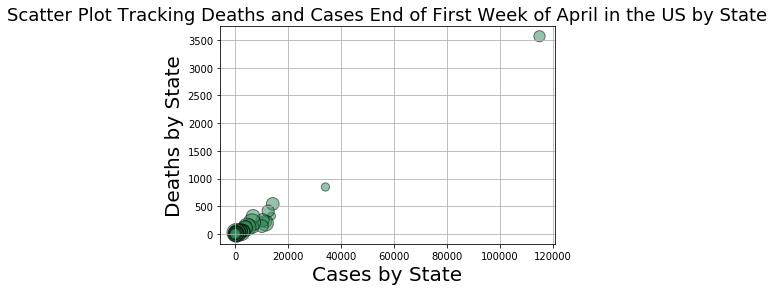

In [9]:
#Scatter plot of the states
plt.scatter("cases", "deaths", alpha = 0.5, color = 'seagreen', edgecolor = 'black', s=size, data = april_8th_cases)

plt.xlabel("Cases by State", size=20)
plt.ylabel("Deaths by State", size=20)
plt.title("Scatter Plot Tracking Deaths and Cases End of First Week of April in the US by State", size=18)

plt.savefig("Visualizations/April_4th_Deaths_vs_Cases_by_US_State_Scatter_Plot.png", dpi=140)

plt.grid()

plt.show()

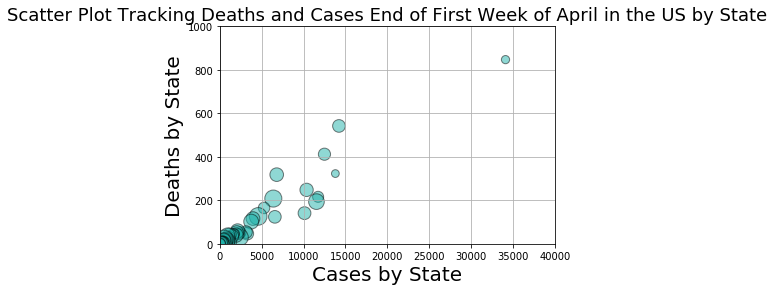

In [10]:
#Scatter plot of the states
plt.scatter("cases", "deaths", alpha = 0.5, color = 'lightseagreen', edgecolor = 'black', s=size, data = april_8th_cases)

plt.xlabel("Cases by State", size=20)
plt.ylabel("Deaths by State", size=20)
plt.title("Scatter Plot Tracking Deaths and Cases End of First Week of April in the US by State", size=18)

plt.xlim(0,40000)
plt.ylim(0,1000)

plt.savefig("Visualizations/April_4th_Deaths_vs_Cases_by_US_State_Scatter_Plot_Size_Close_Up_On_Lesser_Affected_States.png", dpi=140)

plt.grid()

plt.show()

In [52]:
april_8_cases = pd.DataFrame(april_8th_cases)

del april_8_cases['deaths']

In [66]:
april_8_cases = april_8_cases.head(10)
april_8_cases = april_8_cases.reset_index() #reset the index to be able to get the states counted and treated like a column

In [67]:
april_8_cases

,state,cases
0,New York,114996
1,New Jersey,34124
2,Michigan,14225
3,California,13796
4,Louisiana,12492
5,Massachusetts,11736
6,Florida,11537
7,Illinois,10358
8,Pennsylvania,10110
9,Washington,6788


In [75]:
april_states = april_8_cases['state']
april_cases = april_8_cases['cases']

states = []
cases = []
for state in april_states:
    states.append(state)
    
for case in april_cases:    
    cases.append(case)

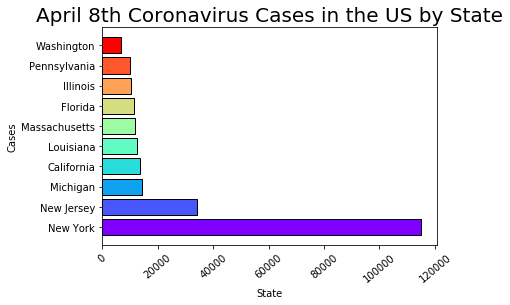

In [83]:
#april_8_cases_sort = april_8_cases.sort_values('cases', ascending=False)

colors = cm.rainbow(np.linspace(0, 1, 10))

plt.barh(states, cases, color = colors, edgecolor = "black")

plt.xticks(rotation=40)

plt.xlabel("State")
plt.ylabel("Cases")

plt.title("April 8th Coronavirus Cases in the US by State", fontsize = 20)

plt.savefig("Visualizations/April_8th_Cases_by_US_State.png", dpi=140)
plt.show()

In [14]:
apr_8_cloud = data[["state", "cases", "date"]]

apr_8_cloud = apr_8_cloud[apr_8_cloud["date"] == "4/8/2020"]

apr_8_cloud = apr_8_cloud[apr_8_cloud["cases"] > 0]

apr_8_cloud

,state,cases,date
40720,Alabama,12,4/8/2020
40721,Alabama,49,4/8/2020
40722,Alabama,3,4/8/2020
40723,Alabama,9,4/8/2020
40724,Alabama,10,4/8/2020
40725,Alabama,3,4/8/2020
40726,Alabama,3,4/8/2020
40727,Alabama,52,4/8/2020
40728,Alabama,140,4/8/2020
40729,Alabama,7,4/8/2020


In [15]:
#Wordcloud attempt for states
#text = " ".join(state for state in apr_8_cloud.state)

text = apr_8_cloud['state'].sum()

print ("There are {} words in the combination of all review.".format(len(text)))

There are 20994 words in the combination of all review.


In [16]:
#text

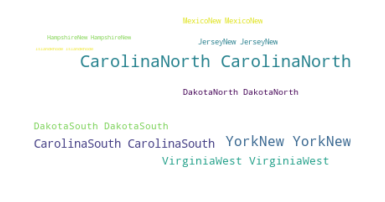

In [17]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="white").generate(str(text))

# Display the generated image:



plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.savefig("Visualizations/April_8th_WordCloud_Determining_Amount_of_Counties_with_Confirmed_Cases_in_Each_State.png", dpi=140)
plt.show()

#Size correlates to how many counties have confirmed cases in each state

In [28]:
#Line graph detailing the growth of cases using the data df
state_growth = pd.DataFrame(data)

state_growth['date'] = pd.to_datetime(state_growth.date)

state_growth_ny = state_growth[state_growth["state"] == "New York"]

state_growth_ny = state_growth_ny.groupby(['state','date']).sum()

state_growth_ny

cases  deaths
state    date                      
New York 2020-03-01       1       0
         2020-03-02       1       0
         2020-03-03       2       0
         2020-03-04      11       0
         2020-03-05      22       0
         2020-03-06      44       0
         2020-03-07      89       0
         2020-03-08     106       0
         2020-03-09     142       0
         2020-03-10     173       0
         2020-03-11     217       0
         2020-03-12     326       0
         2020-03-13     421       0
         2020-03-14     610       2
         2020-03-15     732       6
         2020-03-16     950      10
         2020-03-17    1374      17
         2020-03-18    2382      27
         2020-03-19    4152      30
         2020-03-20    7102      57
         2020-03-21   10356      80
         2020-03-22   15168     122
         2020-03-23   20875     159
         2020-03-24   25666     226
         2020-03-25   33067     331
         2020-03-26   38988     432
         2020-03-27   44636     535
         2020-03-28   53364     782
         2020-03-29   59568     897
         2020-03-30   67216    1062
         2020-03-31   75832    1282
         2020-04-01   83890    1652
         2020-04-02   92770    1958
         2020-04-03  102945    2935
         2020-04-04  114996    3568
         2020-04-05  122911    4161
         2020-04-06  130703    5505
         2020-04-07  140081    5563
         2020-04-08  149401    6268

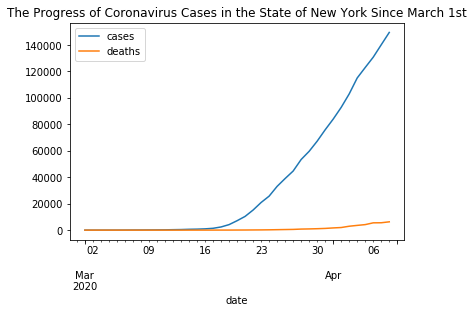

In [32]:
state_growth_ny.reset_index().plot(x='date', y= ['cases', 'deaths'])

plt.title("The Progress of Coronavirus Cases in the State of New York Since March 1st")
plt.show()

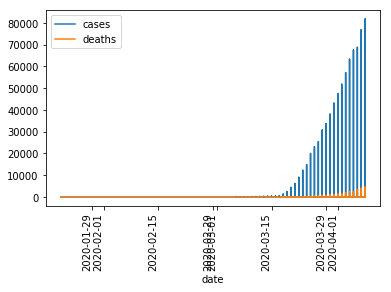

In [35]:
state_growth.reset_index().plot(x='date', y= ['cases', 'deaths'])

plt.xticks(rotation = 90)
plt.show()